# <center><font color=blue>K-means Clustering </font>

<font size=4>Using the data provided in the file “Data.txt” with K = 3, apply K-means algorithm. Each row in the file corresponds to one data point. <br>
One important aspect of K-means that changes the results significantly is the initialization.
So you should run the K-means algorithm with the given initialization below above 100 times. The final output of the K-means clustering is the result that gives the minimum average distance between the points and the centers of their corresponding clusters.<br>
One possible startegy for intialization cluster centers  is to select the furthest points from each other.
</font>


# <center><font color=blue>Solution </font>

<font color=blue size=4>1-Needed Packages

In [ ]:
import numpy as np
import matplotlib.pylab as plt

<font color=blue size=4>2-Load Data

In [ ]:
def RandomSelect(data):
    """
    This Function should implement step 1 in slide 6, Lec 6
    Input: Dataset
    Output: 3-means
    """
    
    #1. Choose First Center randomly 
    m1=data[np.random.randint(len(data))-1,:]
    dist=(np.sum((data-m1)**2,axis=1))**0.5
    #2. select the second one 
    m2=data[np.argmax(dist),:]
    #3. select the third one 
    dist[np.argmax(dist)]=0
    m3=data[np.argmax(dist),:]
   
    
    
    
    return m1,m2,m3 

In [ ]:
def Membership_fcm(data,m1,m2,m3, q):
    """
    This function should implement step 2 in slide 15, Lec 6
    Possible values for rnk will be any value between [0,1] 
    Input: Dataset, 3-means, memership matrix, and the fuzziness Index
    Return: New membership matrix with shape (len(data), 3)
    ** hint: the distace between the cluster mean point and itself is zero,
        it will result NANs and INFs in the rnk equation, 
        you can add epsilon to the distaces in you rnk computaions
    """
    rnk = np.zeros((len(data),3))
    rnk_final = np.zeros((len(data),3))
    d = 3
    for i in range(len(data)):
        denoSumTest = 0
        dist1 = distance.euclidean(data[i,:],m1)
        dist2 = distance.euclidean(data[i,:],m2)
        dist3 = distance.euclidean(data[i,:],m3)
        if dist1 == 0 :
            dist1 += ep
        elif dist2 == 0:
            dist2 += ep
        elif dist3 == 0:
            dist3 += ep


            
        denoSumTest += np.power(1/dist1,1 / (q-1))
        denoSumTest += np.power(1/dist2,1 / (q-1))
        denoSumTest += np.power(1/dist3,1 / (q-1))



        w1 = np.power((1 / dist1), 1 / (q - 1)) / denoSumTest
        w2 = np.power((1 / dist2), 1 / (q - 1)) / denoSumTest
        w3 = np.power((1 / dist3), 1 / (q - 1)) / denoSumTest
        
        rnk[i][0] = w1
        rnk[i][1] = w2
        rnk[i][2] = w3
    assert rnk.shape == (len(data), 3)

    return rnk

In [ ]:
sum([1, 2, 3]+[1, 8, 9])

24

In [ ]:
def MemberShip(data,m1,m2,m3):
    """
    This function should implement step 2 in slide 6, Lec 6
    Possible values for rnk will be 0 or one ore Two
    Input: Dataset, 3-means, and memership vector
    Output: New membership vector
    """
    rnk=np.zeros(len(data)) # Membership Vector
    for i in range(len(data)):
        dist1=np.sqrt(np.sum((data[i,:]-m1)**2))
        dist2=np.sqrt(np.sum((data[i,:]-m2)**2))
        dist3=np.sqrt(np.sum((data[i,:]-m3)**2))
        if dist1 < dist2 and dist1<dist3:
            rnk[i]=0
            
        elif dist2 < dist1 and dist2<dist3:
            rnk[i]=1
           
        elif dist3 < dist1 and dist3 < dist2:
            rnk[i]=2
            
    return rnk


In [ ]:
def updatemeans(data,rnk):
    """
    This function should implement step 3 in slide 6, Lec 6
    
    Input: Dataset and memership vector
    Output:updated 3-means
    """
    m1=np.sum(data[np.where(rnk==0)],axis=0)/len(data[np.where(rnk==0)]) 
    m2=np.sum(data[np.where(rnk==1)],axis=0)/len(data[np.where(rnk==1)])   
    m3=np.sum(data[np.where(rnk==2)],axis=0)/len(data[np.where(rnk==2)])  
    return m1,m2,m3


In [ ]:
m1 = 10
data = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
rnk = np.array([[.1, .2, .3], [.4, .5, .6]], np.int32)
d1 = np.power(rnk[:, 0], 3) * np.sqrt((data-m1)**2).T
d1

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
np.sqrt((data-m1)**2)

array([[9., 8., 7.],
       [6., 5., 4.]])

In [ ]:
np.power(rnk[:, 0], 3)

array([0, 0], dtype=int32)

In [ ]:
def Cost_Function(data,rnk,m1,m2,m3):
    """
    This function should implement  objective Function in slide 5,Lec 6
    
    Input: Dataset, memership vector, and 3-means
    Output:Total Average Distance
    """
    mindis1=[]
    mindis2=[]
    mindis3=[]
    for i in range(len(data)):
        if rnk[i]==0 :
            dist1=np.sqrt(np.sum((data[i,:]-m1)**2))
            mindis1.append(dist1)
        elif rnk[i]==1:
            dist2=np.sqrt(np.sum((data[i,:]-m2)**2))
            mindis2.append(dist2)
        else:
            dist3=np.sqrt(np.sum((data[i,:]-m3)**2))
            mindis3.append(dist3)
    Avgdistf=sum(mindis1+mindis2+mindis3)        
    
    return Avgdistf



In [ ]:
def StoppingCriteria(m1_b,m2_b,m3_b,m1,m2,m3):
    """
    This function should Test Convergence
    
    Input:  3-means before updating and after it.
    Output: return True or  return False
    """
    m1_b,m2_b,m3_b = np.round(m1_b, 5), np.round(m2_b, 5), np.round(m3_b, 5)
    if (np.array_equal(m1,m1_b))  and (np.array_equal(m2,m2_b)) and (np.array_equal(m3,m3_b)):
        return True
    else:
        return False
    
    

        

Object `np.round` not found.


In [ ]:
def StoppingCriteria(m1_b,m2_b,m3_b,m1,m2,m3):
    """
    This function should Test Convergence
    
    Input:  3-means before updating and after it.
    Output: return True or  return False
    """
    if (np.array_equal(m1,m1_b))  and (np.array_equal(m2,m2_b)) and (np.array_equal(m3,m3_b)):
        return True
    else:
        return False
    
    

        

In [ ]:
#________________________Main Code Statrs here___________________________________

data=np.loadtxt("Data.txt") # Load Data
    
counter=0
m1f,m2f,m3f=np.zeros((2,100)),np.zeros((2,100)),np.zeros((2,100)) # 3 - Means 
Avgdist=np.zeros((100,))
while(counter <100):
        # --------------------Intialization Step 1------------------------------#
        m1,m2,m3= RandomSelect(data)
        
      
        
        m1_b=m1
        m2_b=m2
        m3_b=m3
        while(True):
            #---------------Step 2 compute rnk-----------------------------------------#
            
            rnk=MemberShip(data,m1,m2,m3)
            #---------------Step 3 update means-----------------------------------------#
            
            m1,m2,m3=updatemeans(data,rnk)
            #---------------Step 4 Test Convergence -----------------------------------------#
                
            if StoppingCriteria(m1_b,m2_b,m3_b,m1,m2,m3):
                m1f[:,counter],m2f[:,counter],m3f[:,counter]=m1,m2,m3
                
                Avgdist[counter]=Cost_Function(data,rnk,m1,m2,m3)
                break
                
              
            m1_b=m1
            m2_b=m2
            m3_b=m3

        counter+=1     

        


  
    

# Plotting 

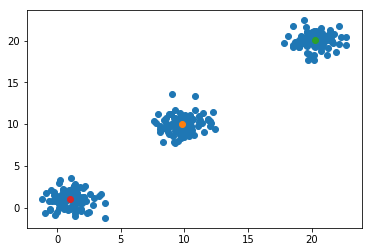

In [ ]:
# Plotting the Final Centroids and data. 
#Don't forget you will use means or centroids that acheive minimum average distance

 
m1p=m1f[:,np.argmin(Avgdist)]
m2p=m2f[:,np.argmin(Avgdist)]
m3p=m3f[:,np.argmin(Avgdist)]
plt.scatter(data[:,0],data[:,1])
plt.scatter(m1p[0], m1p[1])
plt.scatter(m2p[0], m2p[1])
plt.scatter(m3p[0], m3p[1])
plt.show()